In [1]:
#!pip install matplotlib

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
train_df = pd.read_csv('/opt/ml/level2_klue_nlp-level2-nlp-11/dataset/train/train.csv')

In [4]:
train_df.dtypes

id                 int64
sentence          object
subject_entity    object
object_entity     object
label             object
source            object
dtype: object

In [5]:
train_df.head()

,id,sentence,subject_entity,object_entity,label,source
0,0,〈Something〉는 조지 해리슨이 쓰고 비틀즈가 1969년 앨범 《Abbey R...,"{'word': '비틀즈', 'start_idx': 24, 'end_idx': 26...","{'word': '조지 해리슨', 'start_idx': 13, 'end_idx':...",no_relation,wikipedia
1,1,호남이 기반인 바른미래당·대안신당·민주평화당이 우여곡절 끝에 합당해 민생당(가칭)으...,"{'word': '민주평화당', 'start_idx': 19, 'end_idx': ...","{'word': '대안신당', 'start_idx': 14, 'end_idx': 1...",no_relation,wikitree
2,2,K리그2에서 성적 1위를 달리고 있는 광주FC는 지난 26일 한국프로축구연맹으로부터...,"{'word': '광주FC', 'start_idx': 21, 'end_idx': 2...","{'word': '한국프로축구연맹', 'start_idx': 34, 'end_idx...",org:member_of,wikitree
3,3,균일가 생활용품점 (주)아성다이소(대표 박정부)는 코로나19 바이러스로 어려움을 겪...,"{'word': '아성다이소', 'start_idx': 13, 'end_idx': ...","{'word': '박정부', 'start_idx': 22, 'end_idx': 24...",org:top_members/employees,wikitree
4,4,1967년 프로 야구 드래프트 1순위로 요미우리 자이언츠에게 입단하면서 등번호는 8...,"{'word': '요미우리 자이언츠', 'start_idx': 22, 'end_id...","{'word': '1967', 'start_idx': 0, 'end_idx': 3,...",no_relation,wikipedia


In [6]:
#train_label 별 개수 확인인
group = train_df['label'].value_counts()
group

no_relation                            9534
org:top_members/employees              4284
per:employee_of                        3573
per:title                              2103
org:member_of                          1866
org:alternate_names                    1320
per:origin                             1234
org:place_of_headquarters              1195
per:date_of_birth                      1130
per:alternate_names                    1001
per:spouse                              795
per:colleagues                          534
per:parents                             520
org:founded                             450
org:members                             420
per:date_of_death                       418
org:product                             380
per:children                            304
per:place_of_residence                  193
per:other_family                        190
per:place_of_birth                      166
org:founded_by                          155
per:product                     

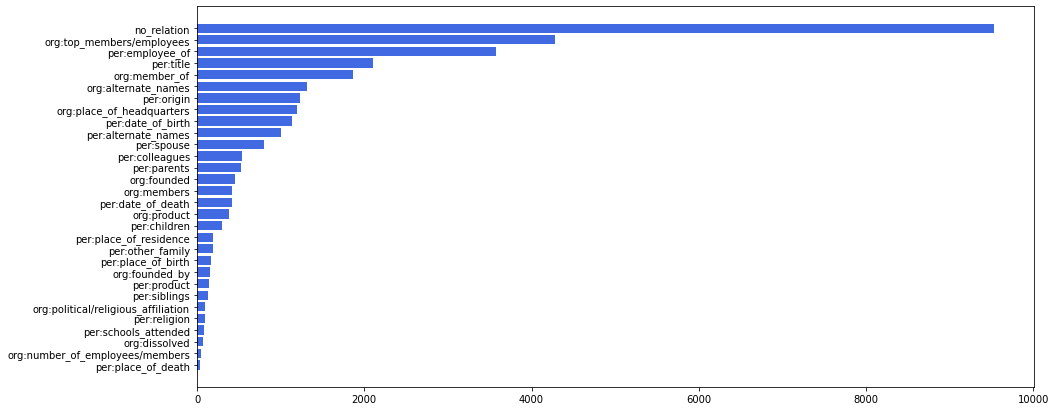

In [7]:
#간단한 비율 확인 EDA
fig, axes = plt.subplots(1, 1, figsize=(15, 7))
axes.barh(group.index[::-1], group[::-1],color='royalblue')

plt.show()

In [8]:
#train라벨별 추출할 valid 개수 계산
valid_count = {}
valid_ratio = 0.1
for x, y in group.items() :
  print(f'{x:40} : {y:5},  ratio : {y / len(train_df) : .5f} , valid_count :  { int(int(len(train_df) * valid_ratio) * (y / len(train_df)))} ' )
  valid_count[x] = int(int(len(train_df) * valid_ratio) * (y / len(train_df)))

no_relation                              :  9534,  ratio :  0.29362 , valid_count :  953 
org:top_members/employees                :  4284,  ratio :  0.13194 , valid_count :  428 
per:employee_of                          :  3573,  ratio :  0.11004 , valid_count :  357 
per:title                                :  2103,  ratio :  0.06477 , valid_count :  210 
org:member_of                            :  1866,  ratio :  0.05747 , valid_count :  186 
org:alternate_names                      :  1320,  ratio :  0.04065 , valid_count :  132 
per:origin                               :  1234,  ratio :  0.03800 , valid_count :  123 
org:place_of_headquarters                :  1195,  ratio :  0.03680 , valid_count :  119 
per:date_of_birth                        :  1130,  ratio :  0.03480 , valid_count :  113 
per:alternate_names                      :  1001,  ratio :  0.03083 , valid_count :  100 
per:spouse                               :   795,  ratio :  0.02448 , valid_count :  79 
per:colleag

In [9]:
#추출전 데이터 shuffle
train_df = train_df.sample(frac=1)

In [10]:
#새로운 dataFrame 정의의
new_valid_df = pd.DataFrame(columns=['id','sentence','subject_entity','object_entity','label','source'])
new_train_df = pd.DataFrame(columns=['id','sentence','subject_entity','object_entity','label','source'])
for idx, item in train_df.iterrows():
  #print(item['id'], item['label'])
  if valid_count[item['label']] > 0 :
    valid_count[item['label']] = valid_count[item['label']] - 1
    new_valid_df.loc[idx]=item
  else :
    new_train_df.loc[idx]=item

In [11]:
#새로운 train_df, valid_df 길이 계산
print( f'train_df len : {len(new_train_df)}')
print( f'valid_df len ; {len(new_valid_df)}')

train_df len : 29234
valid_df len ; 3236


In [12]:
#dict 타입 변수에 저장한 데이터 전부 추출되었는지 확인
sum(valid_count.values())

0

In [13]:
#train_ valid id types 변경
new_valid_df = new_valid_df.astype({'id':'int64'})
new_train_df = new_train_df.astype({'id':'int64'})

In [14]:
new_train_df.dtypes

id                 int64
sentence          object
subject_entity    object
object_entity     object
label             object
source            object
dtype: object

In [15]:
new_valid_df.dtypes

id                 int64
sentence          object
subject_entity    object
object_entity     object
label             object
source            object
dtype: object

In [16]:
new_train_df.head()

,id,sentence,subject_entity,object_entity,label,source
23282,23282,"더빈 의원은 ""내가 만약 한국에 산다면 북한이 한국에 퍼부을 수백 발의 미사일로부터...","{'word': '주한미군', 'start_idx': 274, 'end_idx': ...","{'word': '2만8천500명', 'start_idx': 222, 'end_id...",org:number_of_employees/members,wikipedia
5498,5498,서우학회는 본래 1905년 11월 1일 서우사범학교라는 속성사범과(速成師範科)를 만...,"{'word': '서우사범학교', 'start_idx': 22, 'end_idx':...","{'word': '1905년', 'start_idx': 9, 'end_idx': 1...",org:founded,wikipedia
20243,20243,"1904년 2월 28일, 스포르 리스보아 에 벤피카 (창단 당시 클럽명은 ""그루푸 ...","{'word': '벤피카', 'start_idx': 25, 'end_idx': 27...","{'word': '1904년 2월 28일', 'start_idx': 0, 'end_...",org:founded,wikipedia
18405,18405,"애니메이션 방송 전에 발매된 게임 《올 스타 배틀》로부터 성우진이 대폭 바뀌었고, ...","{'word': 'DIO', 'start_idx': 64, 'end_idx': 66...","{'word': '코야스 타케히토', 'start_idx': 70, 'end_idx...",per:alternate_names,wikipedia
23182,23182,"안드라지 안투니스 안데르송(Andrade Antunes Anderson, 1981년...","{'word': '안드라지 안투니스 안데르송', 'start_idx': 0, 'en...","{'word': 'Andrade Antunes Anderson', 'start_id...",per:alternate_names,wikipedia


In [17]:
new_valid_df.head()

,id,sentence,subject_entity,object_entity,label,source
14508,14508,파펜과 독일 국가인민당 당수인 알프레트 후겐베르크는 만약 총리가 필요한 경우 히틀러...,"{'word': '헤르만 괴링', 'start_idx': 52, 'end_idx':...","{'word': '히틀러 내각', 'start_idx': 43, 'end_idx':...",per:employee_of,wikipedia
12091,12091,"2014년 9월 22일, MGM은 One Three Media 와 LightWork...","{'word': '유나이티드 아티스츠', 'start_idx': 107, 'end_...","{'word': '마크 버넷', 'start_idx': 62, 'end_idx': ...",org:founded_by,wikipedia
17067,17067,나나 크리스티안센은 브뢴뷔 IF에서 주전 미드필더로 활약하면서 브뢴뷔 IF의 엘리테...,"{'word': '나나 크리스티안센', 'start_idx': 0, 'end_idx...","{'word': '미드필더', 'start_idx': 23, 'end_idx': 2...",per:title,wikipedia
8645,8645,"김우빈은 자신이 맡은 최영도에 대해 “기본적으로 선한 면이 있다고 여겼으며, 반항하...","{'word': '최영도', 'start_idx': 12, 'end_idx': 14...","{'word': '김우빈', 'start_idx': 0, 'end_idx': 2, ...",per:alternate_names,wikipedia
22730,22730,"강성태(~)는 대한민국의 저술가 겸 공신닷컴 CEO 및 학원인, 유튜버이다.","{'word': '강성태', 'start_idx': 0, 'end_idx': 2, ...","{'word': '공신닷컴', 'start_idx': 20, 'end_idx': 2...",per:employee_of,wikipedia


In [18]:
#중복 index 확인
train_id = new_train_df['id'].tolist()
valid_id = new_valid_df['id'].tolist()

print("중복인덱스 확인 : " , len(set(train_id) & set(valid_id)) == 0 )
print("총개수 확인 :" , (len(train_id) + len(valid_id)) == len(train_df) ) #train_df와 개수 같은지 확인


중복인덱스 확인 :  True
총개수 확인 : True


In [19]:
#새로운 train 라벨별 개수 확인
new_train_group = new_train_df['label'].value_counts()
new_train_group

no_relation                            8581
org:top_members/employees              3856
per:employee_of                        3216
per:title                              1893
org:member_of                          1680
org:alternate_names                    1188
per:origin                             1111
org:place_of_headquarters              1076
per:date_of_birth                      1017
per:alternate_names                     901
per:spouse                              716
per:colleagues                          481
per:parents                             468
org:founded                             405
org:members                             378
per:date_of_death                       377
org:product                             342
per:children                            274
per:place_of_residence                  174
per:other_family                        171
per:place_of_birth                      150
org:founded_by                          140
per:product                     

In [20]:
#새로운 valid 라벨별 개수 확인
new_valid_group = new_valid_df['label'].value_counts()
new_valid_group

no_relation                            953
org:top_members/employees              428
per:employee_of                        357
per:title                              210
org:member_of                          186
org:alternate_names                    132
per:origin                             123
org:place_of_headquarters              119
per:date_of_birth                      113
per:alternate_names                    100
per:spouse                              79
per:colleagues                          53
per:parents                             52
org:founded                             45
org:members                             42
per:date_of_death                       41
org:product                             38
per:children                            30
per:other_family                        19
per:place_of_residence                  19
per:place_of_birth                      16
org:founded_by                          15
per:product                             13
per:sibling

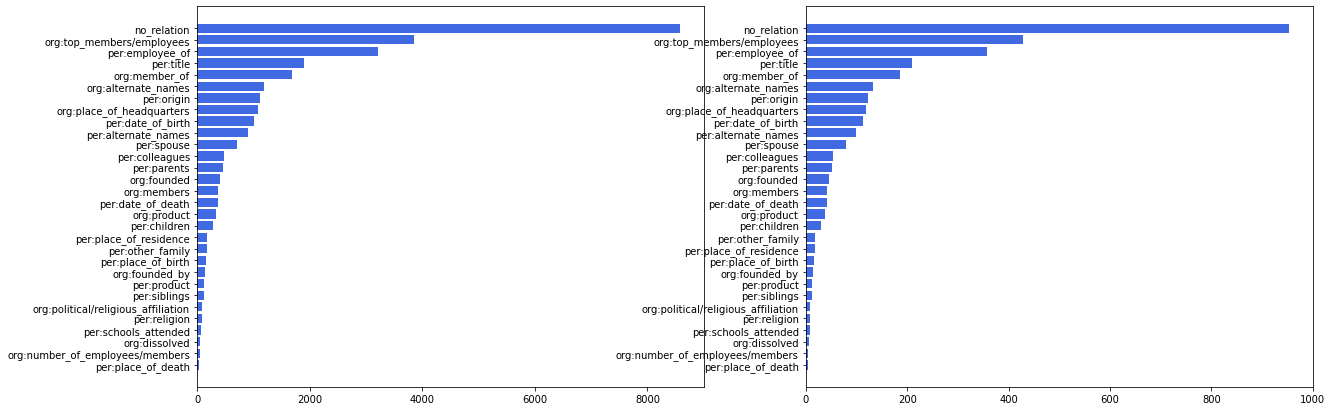

In [21]:
#새로운 train , valid 비율 EDA
fig, axes = plt.subplots(1, 2, figsize=(20, 7))
axes[0].barh(new_train_group.index[::-1], new_train_group[::-1],color='royalblue')
axes[1].barh(new_valid_group.index[::-1], new_valid_group[::-1],color='royalblue')
plt.show()

In [22]:
#csv 파일저장 , index 제거 및 utf-8 encoding
new_train_df.to_csv('./new_train.csv',index=False, encoding = 'utf-8')
new_valid_df.to_csv('./new_valid.csv',index=False, encoding = 'utf-8')